### Exercise 1 Part Copied

In [157]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns
import time
import matplotlib

In [158]:
np.random.seed(999)

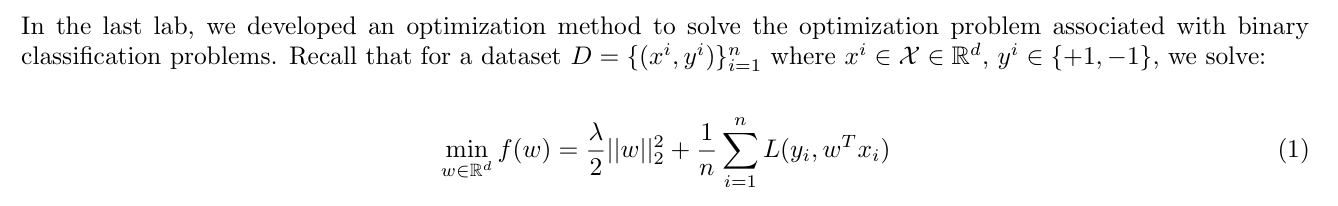

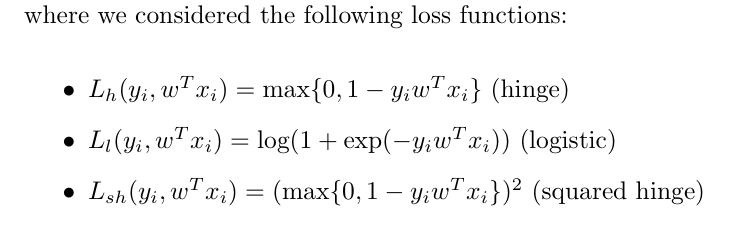

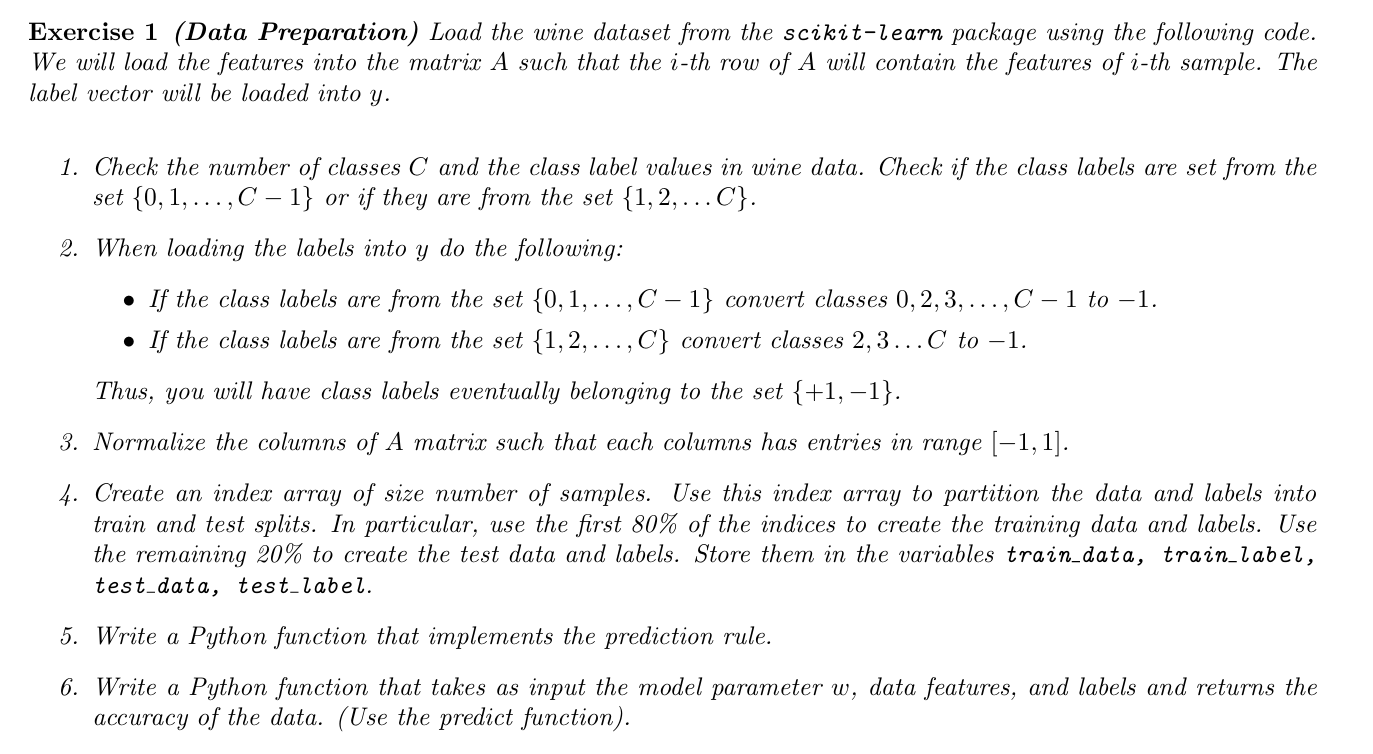

In [159]:
from sklearn.datasets import load_wine

In [160]:
wine = load_wine()

In [161]:
print(wine.data.shape)

(178, 13)


In [162]:
A = wine.data

In [163]:
print(wine.target.shape)

(178,)


In [164]:
n = wine.data.shape[0]
d = wine.data.shape[1]

Question 1. Find number of classes

In [165]:
np.unique(wine.target)

array([0, 1, 2])

It is of form [0,1,...C-1]. Number of classes are 3

Question 2: When loading the labels into y do the following:
 • If the class labels are from the set {0,1,...,C − 1} convert classes 0,2,3,...,C − 1 to −1.
 • If the class labels are from the set {1,2,...,C} convert classes 2,3...C to −1.




In [166]:
y = 1.0*np.ones([A.shape[0], ])
for i in range(wine.target.shape[0]):
  if wine.target[i] != 1:
    y[i]= -1

Question 3: Normalize the columns of A matrix such that each columns has entries in range [−1,1].

In [167]:
for j in range(A.shape[1]):
  # Find the maximum absolute value in each column
  max_abs_values = np.max(np.abs(A[:,j]))
  # Divide each element of the column by the maximum absolute value
  A[:,j] = A[:,j]/max_abs_values

In [168]:
A

array([[0.95954147, 0.29482759, 0.75232198, ..., 0.60818713, 0.98      ,
        0.63392857],
       [0.89008766, 0.30689655, 0.6625387 , ..., 0.61403509, 0.85      ,
        0.625     ],
       [0.88739042, 0.40689655, 0.82662539, ..., 0.60233918, 0.7925    ,
        0.70535714],
       ...,
       [0.89480782, 0.73793103, 0.6996904 , ..., 0.34502924, 0.39      ,
        0.49702381],
       [0.88806473, 0.44655172, 0.73374613, ..., 0.35087719, 0.405     ,
        0.5       ],
       [0.95279838, 0.70689655, 0.84829721, ..., 0.35672515, 0.4       ,
        0.33333333]])

Question 4: Create an index array of size number of samples. Use this index array to partition the data and labels into
 train and test splits. In particular, use the first 80% of the indices to create the training data and labels. Use
 the remaining 20% to create the test data and labels. Store them in the variables train
 data, train
 test
 data, test
 label.

In [169]:
#Create an index array
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices
# print(indexarr) #check indexarr after shuffling

#Use the first 80% of indexarr to create the train data and the remaining
p = int(0.8*len(indexarr))
train_data =  A[indexarr[:p]]
train_label = y[indexarr[:p]]
test_data = A[indexarr[p:]]
test_label = y[indexarr[p:]]

print("len of train data: ", len(train_data))
print("len of train target: ", len(train_label))
print("len of test data: ", len(test_data))
print("len of test target: ", len(test_label))

len of train data:  142
len of train target:  142
len of test data:  36
len of test target:  36


Question 5: Write a Python function that implements the prediction rule.
 label,


In [170]:
def predict(w,x):
  # for w^Tx = 0, since -1 is more I will bias it towards it -1
  if w@x <= 0:
    return -1
  if w@x >0:
    return 1

 Question 6. Write a Python function that takes as input the model parameter w, data features, and labels and returns the
 accuracy of the data. (Use the predict function).

In [171]:
def compute_accuracy(data, labels, model_w):
  #Use predict function defined above
  accuracy = 0.
  assert len(data) == len(labels)
  n = data.shape[0]
  for i in range(n):
    x = data[i]
    prediction = predict(model_w, x)
    if labels[i] == prediction:
      accuracy+=1
  return accuracy/n

### Exercise 3

Modules used in previous labs

In [172]:
def hinge_loss(z):
    return np.maximum(0, 1 - z)

def compute_loss(x, y, w, lamda, n):
  z = y*w@x
  loss = hinge_loss(z)/n
  loss += (lamda*norm(w)**2)/(2*n)
  return loss

def compute_cost(A,y,w,lamda):
  cost = 0
  n = A.shape[0]
  for i in range(n):
    cost += compute_loss(A[i], y[i], w, lamda, n)
  return cost

def subgradient_hingeloss(x, y, w, lamda, n):
  if 1-y*w@x >= 0:
    grad = (lamda*w) - (y*x)
  else: grad = lamda*w
  return grad/n

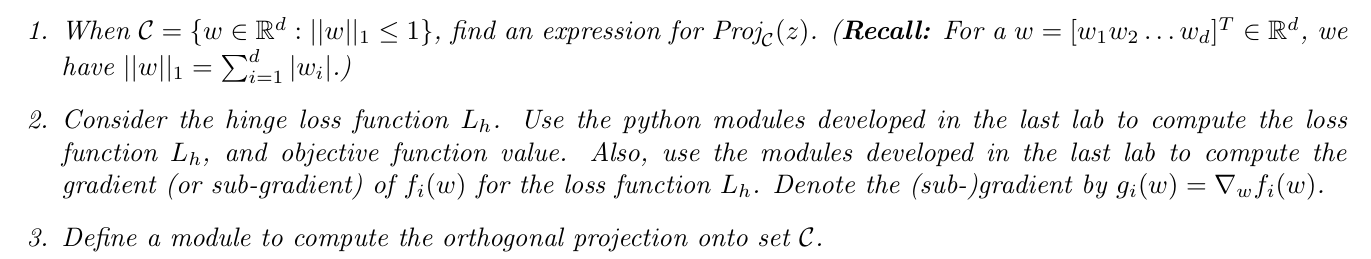


The projection of a vector $z$ onto the set $C = \{ w \in \mathbb{R}^d : ||w||_1 \leq 1 \}$ involves finding the vector $w$ in $C$ that is closest to $z$. Given that $C$ is defined in terms of the $\ell_1$-norm constraint, $||w||_1 = \sum_{i=1}^d |w_i|$, the projection $\text{Proj}_C(z)$ will have the property that $||\text{Proj}_C(z)||_1 \leq 1$.

To find $\text{Proj}_C(z)$, we need to minimize the distance between $z$ and $w$ subject to the constraint $||w||_1 \leq 1$. This can be formulated as an optimization problem:
$
\text{minimize} \quad ||z - w||_2^2 \quad \text{subject to} \quad ||w||_1 \leq 1
$

This optimization problem can be solved using various techniques such as dual problem. In this case, since the constraint set $C$ is a convex set defined by the $\ell_1$-norm, the solution can be obtained using the soft-thresholding operator.

The soft-thresholding operator is defined as follows:
$
\text{soft}_\lambda(x) = \text{sign}(x) \cdot \max(0, |x| - \lambda)
$

where $\lambda$ is a non-negative parameter.

The $\lambda$ can be found using solving dual problem and using a bisection method.

For the given problem, $\text{Proj}_C(z)$ can be expressed as:
$
\text{Proj}_C(z)_i = \text{soft}_\lambda(z_i)
$
where $\text{soft}_\lambda(z_i)$ denotes the soft-thresholding operation applied element-wise to each component of $z$.


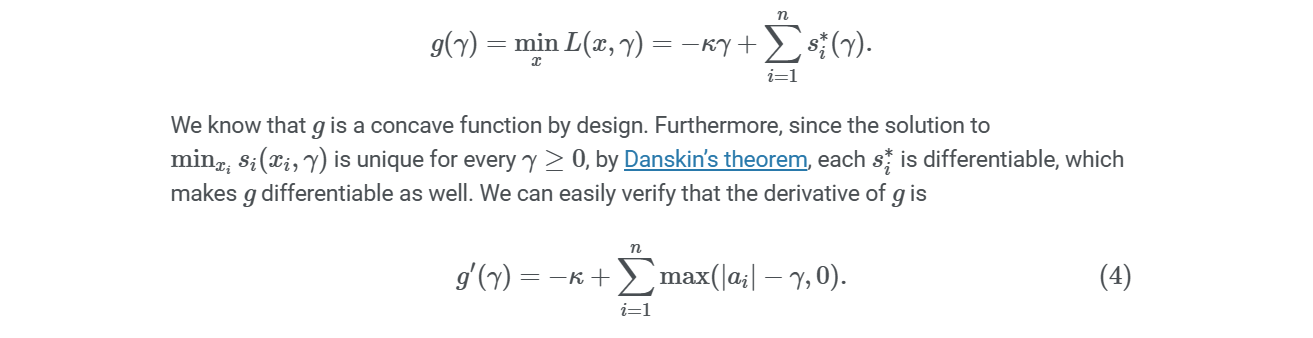


To find the appropriate threshold $\lambda$, we start with an initial interval $[a, b]$, where $a = 0$ and $b = \frac{1}{\kappa} ||w||_2^2$. Here $\kappa$ is 1. We then apply the bisection method to iteratively refine this interval until the difference between $b$ and $a$ becomes smaller than a predefined tolerance $\epsilon$.

At each iteration of the bisection method, we compute the midpoint $c = \frac{{a + b}}{2}$ of the interval and evaluate whether the projection $\text{Proj}_C(z)$ obtained with $c$ as the threshold satisfies the constraint $||\text{Proj}_C(z)||_1 \leq 1$. If it does, we update the upper bound $b$ to $c$; otherwise, we update the lower bound $a$ to $c$.

This process continues until the interval $[a, b]$ converges to a single value, which represents the threshold $\lambda$ that satisfies the constraint. This threshold is then used to compute the final projection $\text{Proj}_C(z)$.

The bisection method guarantees convergence to a solution within a specified tolerance and is particularly useful for finding thresholds that satisfy certain constraints, such as the $\ell_1$-norm constraint in this case.



Module to compute the projection below:

In [173]:
def dual_grad(gamma, kappa, a):
    return - kappa + np.sum(np.maximum(np.abs(a) - gamma, 0))

def bisection(a, kappa, eps=1e-5):
    gamma_min, gamma_max = 0, (1 / (2 * kappa)) * np.sum(a ** 2)
    gamma = (gamma_max + gamma_min) / 2
    # Run until gamma_max and gamma_min are the same
    while gamma_max - gamma_min > eps:
        gamma = (gamma_max + gamma_min) / 2
        grad = dual_grad(gamma, kappa, a)
        if grad < 0:
            gamma_max = gamma
        else:
            gamma_min = gamma
    return gamma

In [174]:
def soft_thresholding(x, threshold):

    return np.sign(x) * np.maximum(0, np.abs(x) - threshold)

def projection_onto_l1_ball(z):
    threshold = bisection(z, 1)
    return soft_thresholding(z, threshold)

# Example usage
z = np.array([2.6, 0.5, 0.3, 0.6])  # Input vector
proj_z = projection_onto_l1_ball(z)
print("Projection of z onto the set C:", proj_z)


Projection of z onto the set C: [1.00000467 0.         0.         0.        ]


We know that $f_i(w)$ is where $L$ is $L_h$ loss

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_h\left(y_i, w^T x_i\right)$$


The subdifferential of the hinge loss with respect to $w$ can be calculated as follows:

When $1-y w^T x<0$, the hinge loss is 0 , so its gradient is 0 .

When $1-y w^T x>0$, the hinge loss is $1-y w^T x$, so the gradient with respect to $w$ is simply $-y x$, because $\frac{∂ \left(1-y w^T x\right)}{∂ w}=-y x$.

Therefore, the subgradient of the hinge loss with respect to $w$ is:
$$
\nabla_w L_h\left(y, w^T x\right)= \begin{cases}-y x & \text { if } 1-y w^T x>0 \\ 0 & \text { if }1-y w^T x<0 \end{cases}
$$

When $1-y w^T x=0$, the hinge loss function is exactly at the hinge point where it changes from being zero to positive. At this point, the function is not differentiable, but we can still consider its subdifferential.

The subdifferential of the hinge loss function at this point includes all possible gradients between the points where the loss is zero and positive. In other words, any value between $-y x$ when $1-$ $y w^T x>0$ and 0 when $1-y w^T x \leq 0$ is included in the subdifferential.

Therefore, at $1-y w^T x=0$, the derivative is not well-defined, but any value between $-y x$ and 0 can be considered as a subgradient. Typically, a common choice is to include $-y x$ as the subgradient at this point.

Therefore for the regularized version, we have:

$$
\nabla_w f_i\left(y, w^T x\right)= \begin{cases}\frac{\lambda w}{n}-\frac{y x}{n} & \text { if } 1-y w^T x \geq 0 \\ \frac{\lambda w}{n} & \text { if }1-y w^T x<0 \end{cases}
$$

This is often used in optimization algorithms such as subgradient descent when dealing with hinge loss.

In [175]:
def OPT1(data,labels,lamda,num_epochs):
  t = 1
  n = data.shape[0]
  d = data.shape[1]

  ## initialization of lists for further questions (DB Store)
  objective_values = [ ]
  test_set_accuracy = []
  train_set_accuracy = []

  #initialize w
  w = np.random.randn(d,1)
  w = w.flatten()
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      w = w-(subgradient_hingeloss(data[i], labels[i], w, lamda, n)/t)
      w= projection_onto_l1_ball(w)
      t = t+1
      if t>1e4:
        t = 1
    objective_value = compute_cost(data, labels, w, lamda)
    test_accuracy = compute_accuracy(test_data, test_label, w)
    train_accuracy = compute_accuracy(data, labels, w)
    # print("Lamda is: ", lamda)
    # print("Epoch no. : ", epoch)
    # print("Objective values: ", objective_value)
    # print("test accuracy: ", test_accuracy)
    # print("train accuracy: ", train_accuracy)
    # print('--------------------------------------')
    objective_values.append(objective_value)
    test_set_accuracy.append(test_accuracy)
    train_set_accuracy.append(train_accuracy)
  return w, objective_values, test_set_accuracy, train_set_accuracy

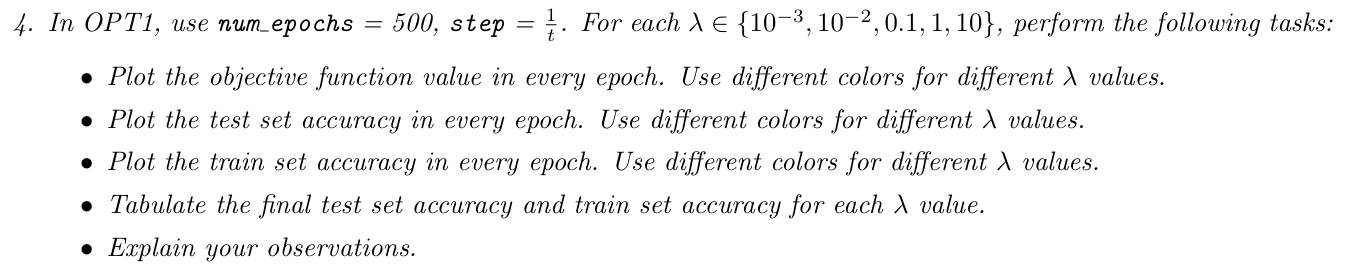

In [176]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]    #[1e-3, 1e-2, 0.1, 1, 10]
objective_values_lamda_store = []
test_set_accuracy_store = []
train_set_accuracy_store = []
final_test_set_accuracy_store = []
epochs = [i for i in range(500)]
for lamda in lamdas:
  w, objective_values, test_set_accuracy, train_set_accuracy = OPT1(train_data, train_label, lamda, 500)
  # plt.plot(epochs, objective_values, label = f'$\lambda$ = {lamda}')
  objective_values_lamda_store.append(objective_values)
  test_set_accuracy_store.append(test_set_accuracy)
  train_set_accuracy_store.append(train_set_accuracy)
# plt.legend()
# plt.show()

 Plot the objective function value in every epoch. Use different colors for different λ values

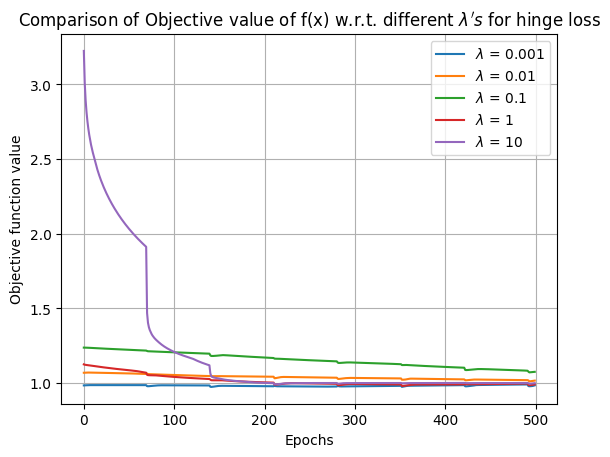

In [180]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]
epochs = [i for i in range(500)]
i=0
for lamda in lamdas:
  plt.plot(epochs, objective_values_lamda_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Comparison of Objective value of f(x) w.r.t. different $\lambda's$ for hinge loss")
plt.legend()
plt.grid(True)
plt.show()

we observe that both the $ \lambda = 10, 0.001 $ achieve a lower objective value than others.

Plot the test set accuracy in every epoch. Use different colors for different λ values.

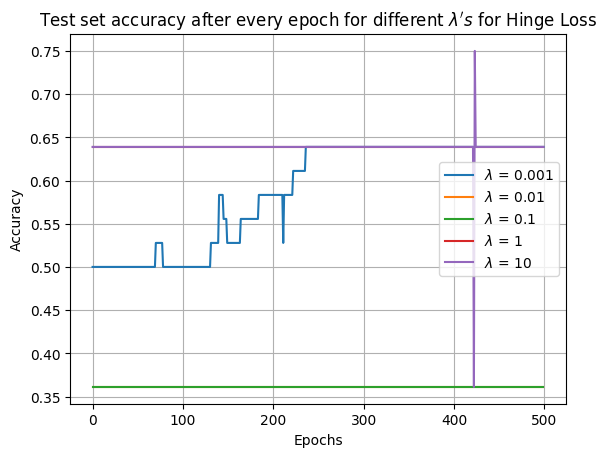

In [181]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]
epochs = [i for i in range(500)]
i=0
for lamda in lamdas:
  plt.plot(epochs, test_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for different $\lambda's$ for Hinge Loss")
plt.legend()
plt.grid(True)
plt.show()

we observe that $\lambda = 0.001, 10$ achieve a higher test accuracy compared to others


Plot the train set accuracy in every epoch. Use different colors for different λ values

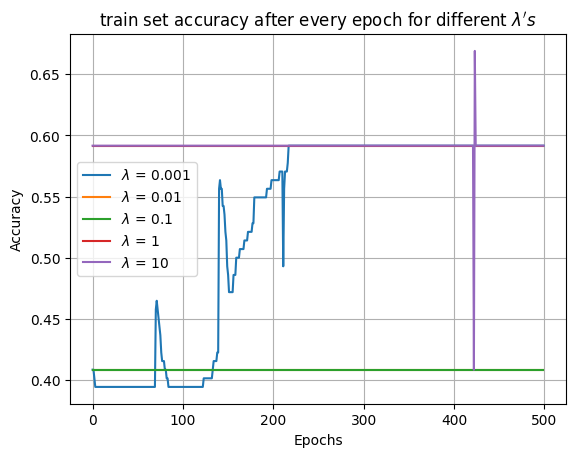

In [182]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]
epochs = [i for i in range(500)]
i=0
for lamda in lamdas:
  plt.plot(epochs, train_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("train set accuracy after every epoch for different $\lambda's$")
plt.legend()
plt.grid(True)
plt.show()

we observe that $\lambda = 0.001, 10$ achieve a higher test accuracy compared to others


In [183]:
list_of_final_train_set_accuracy = [x[-1] for x in train_set_accuracy_store]
list_of_final_test_set_accuracy = [x[-1] for x in test_set_accuracy_store]

In [184]:
from tabulate import tabulate
head = [f"lambda", "Train set accuracy","Test set accuracy"]
table=[[lamdas[i], list_of_final_train_set_accuracy[i], list_of_final_test_set_accuracy[i]] for i in range(len(lamdas)) ]
print(tabulate(table, headers=head, tablefmt="grid"))

+----------+----------------------+---------------------+
|   lambda |   Train set accuracy |   Test set accuracy |
+==========+======================+=====================+
|    0.001 |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|    0.01  |             0.408451 |            0.361111 |
+----------+----------------------+---------------------+
|    0.1   |             0.408451 |            0.361111 |
+----------+----------------------+---------------------+
|    1     |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|   10     |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+


Explain your observations.

Observations:

Incorporating the projection into SGD ensures that the parameter updates remain within the feasible set defined by the constraint $||w||_1 ≤1$ while minimizing the hinge loss. This is particularly useful when you need to enforce a sparsity constraint on the parameter vector w while optimizing for classification tasks using hinge loss. The projection helps stabilize the optimization process by preventing the iterates from diverging or oscillating excessively, especially in high-dimensional spaces. This can lead to more robust convergence behavior and better generalization performance, particularly in scenarios where the optimization landscape is complex or noisy.

Sparse Solutions: The projection encourages sparsity in the parameter vector w by penalizing large coefficients and promoting zeros. This can lead to solutions that are more interpretable and efficient, especially in settings where feature selection or model interpretability is important.

Trade-off Between Sparsity and Classification Performance: Incorporating the
L1 -norm constraint may introduce a trade-off between sparsity and classification performance. While enforcing sparsity can help reduce overfitting and improve generalization, it may also lead to a slight degradation in classification accuracy compared to unconstrained optimization approaches.

The projection alters the learning dynamics of SGD by modifying the update direction at each iteration. This can impact the speed and direction of convergence, as well as the trajectory followed by the optimization algorithm in the parameter space. the projection operation adds computational overhead to each iteration of SGD, as it involves computing the soft-thresholding operation for each parameter vector w. The additional computational cost should be taken into account, especially for large-scale optimization problems.

Overall, incorporating the projection obtained from the bisection method into SGD for hinge loss optimization can lead to sparse and interpretable solutions while ensuring stability and adherence to the sparsity constraint. However, the trade-offs between sparsity, classification performance, and computational complexity should be carefully considered when applying this approach in practice.

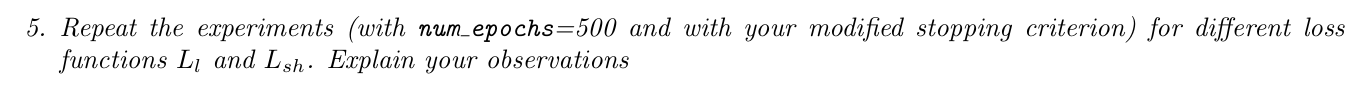

In [185]:
def logistic_loss(z):
    return np.log(1+np.exp(-z))

def compute_logistic_loss(x, y, w, lamda, n):
  z = y*w@x
  loss = logistic_loss(z)/n
  loss += (lamda*norm(w)**2)/(2*n)
  return loss

def compute_logistic_cost(A,y,w,lamda):
  cost = 0
  n = A.shape[0]
  for i in range(n):
    cost += compute_logistic_loss(A[i], y[i], w, lamda, n)
  return cost

In [186]:
def sqhinge_loss(z):
    return (np.maximum(0, 1-z))**2

def compute_sqhinge_loss(x, y, w, lamda, n):
  z = y*w@x
  loss = sqhinge_loss(z)/n
  loss += (lamda*norm(w)**2)/(2*n)
  return loss

def compute_sqhinge_cost(A,y,w,lamda):
  cost = 0
  n = A.shape[0]
  for i in range(n):
    cost += compute_sqhinge_loss(A[i], y[i], w, lamda, n)
  return cost

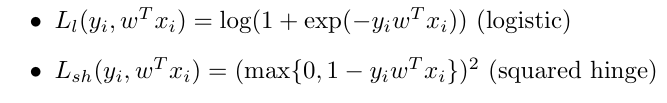

We know that $f_i(w)$ is where $L$ is $L_i$ loss

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_l\left(y_i, w^T x_i\right)$$


We know that $f_i(w)$ is where $L$ is $L_{sh}$ loss

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_{sh}\left(y_i, w^T x_i\right)$$


Now I calculate gradient for each of these fucntions:

The logistic loss function $L_l$ is given by:
$$
L_l\left(y, w^T x\right)=\log \left(1+\exp \left(-y w^T x\right)\right)
$$

To compute the gradient (or subgradient) of $L_l$ with respect to the weight vector $w$, applying the chain rule, we have:
$$
\frac{\partial L_l}{\partial w}= \frac{1}{1+\exp \left(-y w^T x\right)}\frac{∂\exp(-yw^Tx)}{∂w} = \frac{-yx\exp(-yw^Tx)}{1+\exp \left(-y w^T x\right)}
$$

We can simplify this to:
$$
\nabla_w L_l\left(y, w^T x\right)=-y x \frac{1}{1+\exp \left(y w^T x\right)}
$$


which will imply that, for the regularized version, we have:

$$
\nabla_w f_i(w)=\nabla_w (\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_l\left(y_i, w^T x_i\right)) =  \frac{\lambda w}{n} + \frac{-yx}{n(1+exp(yw^Tx))}
$$


The squared hinge loss function $L_{s h}$ is given by:
$$
L_{s h}\left(y, w^T x\right)=\left(\max \left(0,1-y w^T x\right)\right)^2
$$

The gradient (or subgradient) of $L_{s h}$ with respect to the weight vector $w$ can be calculated as follows:

$$
\nabla_w L_{sh}\left(y, w^T x\right)=
\begin{cases}
-2(1-yw^Tx)(yx) & \text { if } 1-yw^Tx \geq 0 \\
0 & \text{ if } 1-yw^Tx < 0
\end{cases}
$$


which will imply that, for the regularized version, we have:

$$
\nabla_w f_i(w)=\nabla_w (\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_{sh}\left(y_i, w^T x_i\right)) =  \begin{cases} \frac{\lambda w}{n} + \frac{-2(1-yw^Tx)(yx)}{n} & \text { if } 1-yw^Tx \geq 0 \\
 \frac{\lambda w}{n} & \text { if } 1-yw^Tx < 0
\end{cases}
$$


In [204]:
def gradient_sqhinge(x, y, w, lamda, n):
  if 1-y*w@x >= 0:
    grad = -2*(1-y*w@x)*y*x
    grad += lamda*w
    grad /= n
    return grad
  else: return lamda*w/n

def gradient_logistic(x, y, w, lamda, n):
  z = y*w@x
  grad = (-1*y*x)/(1 + np.exp(z))
  grad += lamda*w
  grad /= n
  return grad

In [205]:
def OPT1_with_stopping_criterion_with_logisticloss(data, labels, lamda, num_epochs):
    t = 1
    w = np.random.randn(data.shape[1], 1)  # initialize weight vector
    w = w.flatten()
    arr = np.arange(data.shape[0])
    n = data.shape[0]
    d = data.shape[1]

    ## initialization of lists for further questions (DB Store)
    objective_values = [ ]
    test_set_accuracy = []
    train_set_accuracy = []
    best_test_accuracy = 0
    epochs_without_improvement = 0
    best_weights = None

    for epoch in range(num_epochs):
        np.random.shuffle(arr)  # shuffle data every epoch
        for i in np.nditer(arr):
            w = w-gradient_logistic(data[i], labels[i], w, lamda, n)/t
            w= projection_onto_l1_ball(w)
            t += 1
            if t > 1e4:
                t = 1
        objective_value = compute_logistic_cost(data, labels, w, lamda)
        test_accuracy = compute_accuracy(test_data, test_label, w)
        train_accuracy = compute_accuracy(data, labels, w)

        objective_values.append(objective_value)
        test_set_accuracy.append(test_accuracy)
        train_set_accuracy.append(train_accuracy)

        # Check for improvement in test accuracy
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_weights = w
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        # print("Epoch no. : ", epoch)
        # print("Objective values: ", objective_value)
        # print("test accuracy: ", test_accuracy)
        # print("train accuracy: ", train_accuracy)
        # print('--------------------------------------')

        # Stopping criterion: If no improvement for 200 epochs, stop
        if epochs_without_improvement >= 200:
            break

    return best_weights, best_test_accuracy, objective_values, test_set_accuracy, train_set_accuracy


In [206]:
def OPT1_with_stopping_criterion_with_sqhinge(data, labels, lamda, num_epochs):
    t = 1
    w = np.random.randn(data.shape[1], 1)  # initialize weight vector
    w = w.flatten()
    arr = np.arange(data.shape[0])
    n = data.shape[0]
    d = data.shape[1]

    ## initialization of lists for further questions (DB Store)
    objective_values = [ ]
    test_set_accuracy = []
    train_set_accuracy = []
    best_test_accuracy = 0
    epochs_without_improvement = 0
    best_weights = None

    for epoch in range(num_epochs):
        np.random.shuffle(arr)  # shuffle data every epoch
        for i in np.nditer(arr):
            w = w-gradient_sqhinge(data[i], labels[i], w, lamda, n)/t
            w= projection_onto_l1_ball(w)
            t += 1
            if t > 1e4:
                t = 1
        objective_value = compute_sqhinge_cost(data, labels, w, lamda)
        test_accuracy = compute_accuracy(test_data, test_label, w)
        train_accuracy = compute_accuracy(data, labels, w)

        objective_values.append(objective_value)
        test_set_accuracy.append(test_accuracy)
        train_set_accuracy.append(train_accuracy)

        # Check for improvement in test accuracy
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_weights = w
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        # print("Epoch no. : ", epoch)
        # print("Objective values: ", objective_value)
        # print("test accuracy: ", test_accuracy)
        # print("train accuracy: ", train_accuracy)
        # print('--------------------------------------')

        # Stopping criterion: If no improvement for 200 epochs, stop
        if epochs_without_improvement >= 200:
            break

    return best_weights, best_test_accuracy, objective_values, test_set_accuracy, train_set_accuracy


In [207]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]    #[1e-3, 1e-2, 0.1, 1, 10]
objective_values_lamda_store = []
test_set_accuracy_store = []
train_set_accuracy_store = []
final_test_set_accuracy_store = []
epochs = [i for i in range(500)]
for lamda in lamdas:
  best_weights, best_test_accuracy, objective_values, test_set_accuracy, train_set_accuracy = OPT1_with_stopping_criterion_with_logisticloss(train_data, train_label, lamda, 500)
  # plt.plot(epochs, objective_values, label = f'$\lambda$ = {lamda}')
  print("Best Weights: ", best_weights)
  objective_values_lamda_store.append(objective_values)
  test_set_accuracy_store.append(test_set_accuracy)
  train_set_accuracy_store.append(train_set_accuracy)
# plt.legend()
# plt.show()

Best Weights:  [-0.00000000e+00  2.65241036e-06  9.48794224e-06 -7.00362183e-01
  8.10904930e-07  1.34991402e-06  2.87970885e-06  1.85760972e-05
  2.91262280e-01  0.00000000e+00  8.87842876e-06  3.46313283e-06
 -4.67458317e-05]
Best Weights:  [-0.         -0.         -0.02145178 -0.16698217 -0.         -0.
 -0.         -0.         -0.         -0.          0.16659716 -0.
 -0.13021091]
Best Weights:  [-0.00870844 -0.00596914 -0.00760607  0.10561368 -0.00607734 -0.00427277
 -0.00149163 -0.0045047  -0.28399112 -0.00655375 -0.00302809 -0.00385121
 -0.00433019]
Best Weights:  [-0.00804707 -0.00168348 -0.00658845 -0.00392041  0.06448783  0.18118173
 -0.00331677 -0.00281534 -0.00243411 -0.00346117 -0.00400727 -0.00563249
  0.69180946]
Best Weights:  [-5.82643194e-05 -2.38932712e-01  2.15963380e-01 -8.50876910e-05
 -2.63732931e-01 -2.65943308e-05 -5.52400030e-05 -5.20383543e-05
 -5.43423672e-05  2.11997419e-03  7.79881145e-04  3.74903646e-04
 -4.01862079e-04]


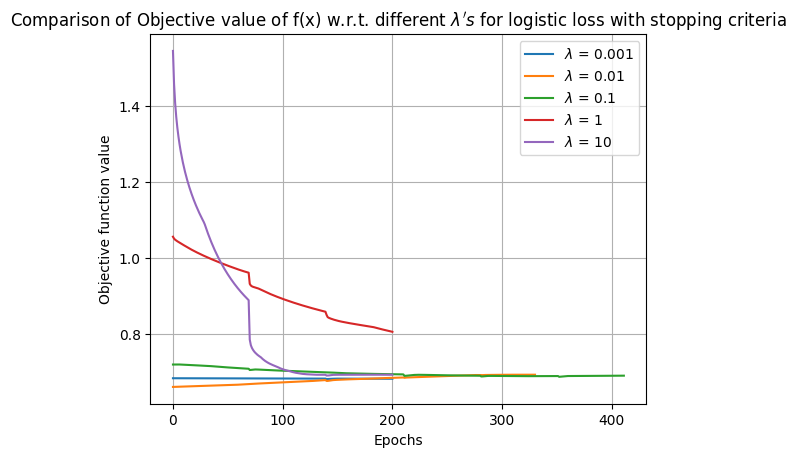

In [209]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]

i=0
for lamda in lamdas:
  epochs = [i for i in range(len(objective_values_lamda_store[i]))]
  plt.plot(epochs, objective_values_lamda_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Comparison of Objective value of f(x) w.r.t. different $\lambda's$ for logistic loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

As we observe that for few lambdas the algorithm stop earlier whereas for lambda = 0.1 it goes till 400 epochs. Objective function itself is not decreasing for all but lambda = 1 which was early stopped because of the algorithm.

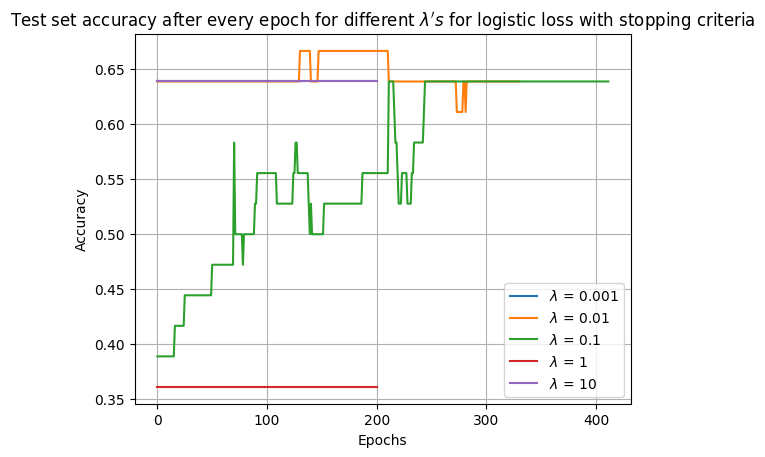

In [214]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]
i=0
for lamda in lamdas:
  epochs = [i for i in range(len(test_set_accuracy_store[i]))]
  plt.plot(epochs, test_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for different $\lambda's$ for logistic loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

For intial weights being all random, the test accuracy is same for all the $\lambda 's$ at 0.64 after sufficient epochs but for $\lambda = 1$ it is .36 only, surprisingly it is more than the train set accuracy, which might indicate underfit or small amount of data but also can be from sparsity because of the projection.

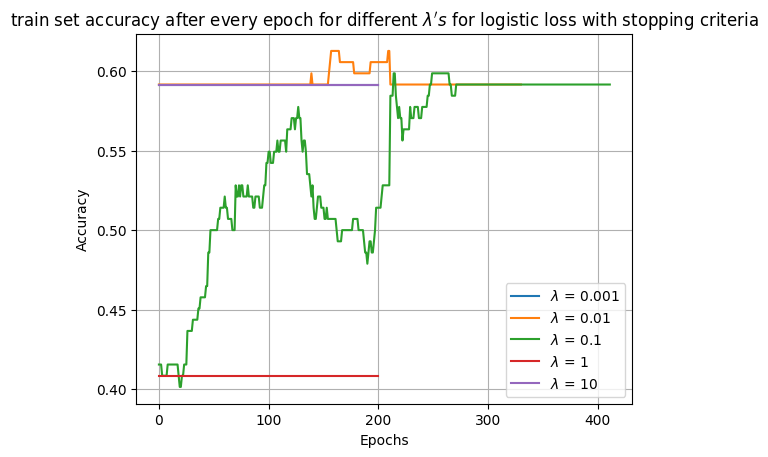

In [211]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]

i=0
for lamda in lamdas:
  epochs = [i for i in range(len(train_set_accuracy_store[i]))]
  plt.plot(epochs, train_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("train set accuracy after every epoch for different $\lambda's$ for logistic loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

For few lambdas the algorithm was early stopped, and was not able to get apt train accuracy, whereas after sufficient epochs, all but for one lambda, the accuracy is 0.59

In [212]:
list_of_final_train_set_accuracy = [x[-1] for x in train_set_accuracy_store]
list_of_final_test_set_accuracy = [x[-1] for x in test_set_accuracy_store]

In [215]:
from tabulate import tabulate
head = [f"lambda", "Train set accuracy","Test set accuracy"]
table=[[lamdas[i], list_of_final_train_set_accuracy[i], list_of_final_test_set_accuracy[i]] for i in range(len(lamdas)) ]
print(tabulate(table, headers=head, tablefmt="grid"))

+----------+----------------------+---------------------+
|   lambda |   Train set accuracy |   Test set accuracy |
+==========+======================+=====================+
|    0.001 |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|    0.01  |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|    0.1   |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|    1     |             0.408451 |            0.361111 |
+----------+----------------------+---------------------+
|   10     |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+


Observations:
The projection onto the L1 -norm ball enforces sparsity in the parameter vector w by penalizing large coefficients and promoting zeros, we can observe the same in printing statement of best weights. In the context of logistic loss, this regularization encourages a simpler model with fewer non-zero parameters, which can improve generalization performance by preventing overfitting to the training data.

If you observe the same test accuracy for all regularized parameters, it suggests that the regularization strength (i.e., the threshold parameter obtained from the bisection method) does not significantly affect the model's ability to generalize to unseen data. This could indicate that the model is robust to changes in the regularization parameter within the range explored.

The projection encourages sparsity in the parameter vector w, which can lead to a simpler and more interpretable model. However, there may be a trade-off between sparsity and model complexity, as reducing the number of non-zero parameters could limit the model's capacity to capture intricate patterns in the data, potentially resulting in similar test accuracies across different regularization strengths. The sparse solutions obtained from the projection can provide insights into the most relevant features or predictors for the classification task. By promoting sparsity in the parameter vector w, the model may focus on a subset of informative features while disregarding irrelevant or redundant ones, thereby enhancing interpretability.







SQUARED HINGE

In [217]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]    #[1e-3, 1e-2, 0.1, 1, 10]
objective_values_lamda_store = []
test_set_accuracy_store = []
train_set_accuracy_store = []
final_test_set_accuracy_store = []
epochs = [i for i in range(500)]
for lamda in lamdas:
  best_weights, best_test_accuracy, objective_values, test_set_accuracy, train_set_accuracy = OPT1_with_stopping_criterion_with_sqhinge(train_data, train_label, lamda, 500)
  # plt.plot(epochs, objective_values, label = f'$\lambda$ = {lamda}')
  print("Best weights: ", best_weights)
  objective_values_lamda_store.append(objective_values)
  test_set_accuracy_store.append(test_set_accuracy)
  train_set_accuracy_store.append(train_set_accuracy)
# plt.legend()
# plt.show()

Best weights:  [-0.02457052 -0.01820009  0.28969536 -0.01498509 -0.01495063 -0.01254389
 -0.00303536 -0.01861788 -0.00810575 -0.01793418 -0.52780144 -0.00978958
 -0.01437868]
Best weights:  [ 7.67131056e-03 -9.31634690e-06  5.81623384e-03  6.30388876e-03
  2.48869122e-03  4.41718353e-03  5.30033512e-04  2.11125038e-03
  1.57768300e-03 -1.51413082e-05  4.51908944e-03 -9.64078987e-01
  0.00000000e+00]
Best weights:  [-1.46591723e-02 -2.03649511e-01 -9.99185093e-03  7.48892280e-01
 -5.27863424e-03 -3.45507614e-03  2.36359863e-05 -2.29700369e-03
  4.02465461e-05 -2.84054461e-03  2.08282040e-06 -3.78034917e-03
 -3.87821706e-03]
Best weights:  [ 1.50397541e-04  3.88162475e-03  1.27520664e-02  1.36472215e-02
  8.82003479e-03 -8.93227725e-01  8.29598554e-03  3.16706020e-03
  9.77828305e-03 -1.16012564e-03  1.03210089e-02  1.70387329e-02
  1.36275952e-02]
Best weights:  [ 5.53886502e-04  3.83063324e-05 -1.00482904e-01  3.11375404e-03
 -2.14408089e-01  3.62994531e-04  7.13557632e-02 -8.81405136e

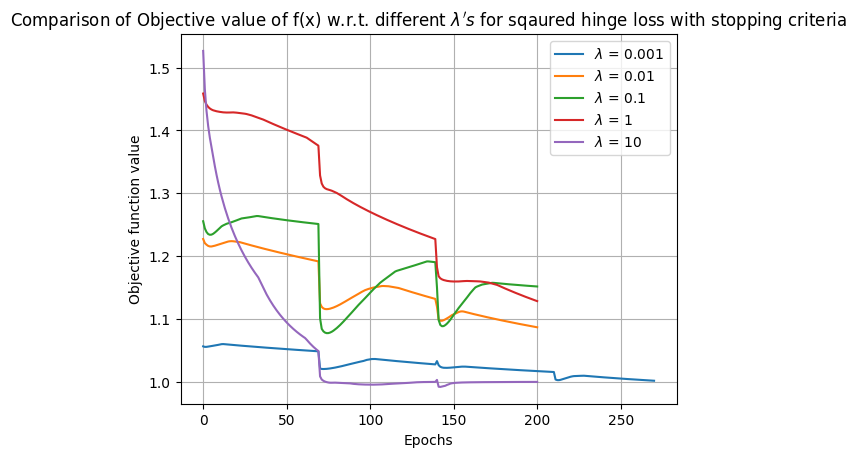

In [218]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]

i=0
for lamda in lamdas:
  epochs = [i for i in range(len(objective_values_lamda_store[i]))]
  plt.plot(epochs, objective_values_lamda_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Comparison of Objective value of f(x) w.r.t. different $\lambda's$ for sqaured hinge loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

As we observe, for lambda = 10 achieves lowest objective value and converges much faster than other counterpart. But all of the algorithms are stopping at tolerance itself except lambda = 0.001, showing that accuracy isn't improving.

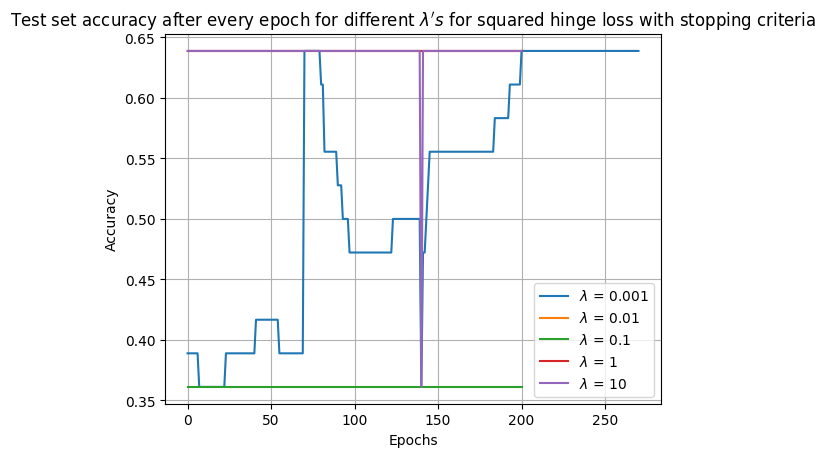

In [219]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]
i=0
for lamda in lamdas:
  epochs = [i for i in range(len(test_set_accuracy_store[i]))]
  plt.plot(epochs, test_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for different $\lambda's$ for squared hinge loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

Test set accuracy same for all the lambdas except lambda = 0.1

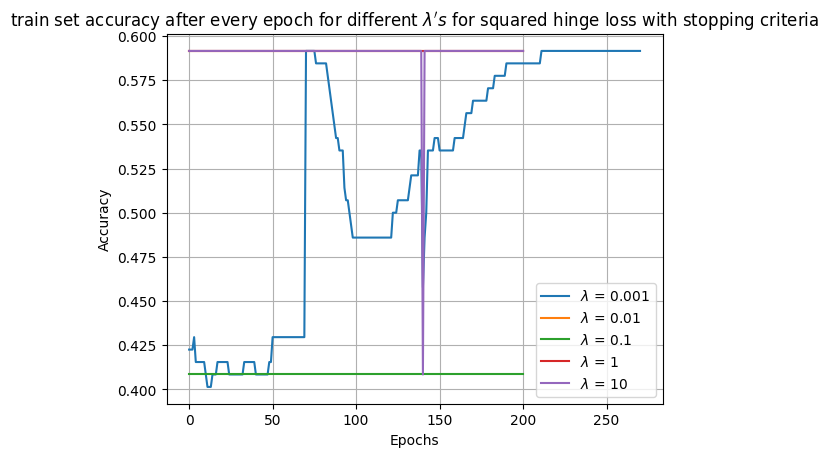

In [220]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]

i=0
for lamda in lamdas:
  epochs = [i for i in range(len(train_set_accuracy_store[i]))]
  plt.plot(epochs, train_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("train set accuracy after every epoch for different $\lambda's$ for squared hinge loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

Training accuracy is same as well for all except $\lambda = 0.1$

In [221]:
list_of_final_train_set_accuracy = [x[-1] for x in train_set_accuracy_store]
list_of_final_test_set_accuracy = [x[-1] for x in test_set_accuracy_store]

In [222]:
from tabulate import tabulate
head = [f"lambda", "Train set accuracy","Test set accuracy"]
table=[[lamdas[i], list_of_final_train_set_accuracy[i], list_of_final_test_set_accuracy[i]] for i in range(len(lamdas)) ]
print(tabulate(table, headers=head, tablefmt="grid"))

+----------+----------------------+---------------------+
|   lambda |   Train set accuracy |   Test set accuracy |
+==========+======================+=====================+
|    0.001 |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|    0.01  |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|    0.1   |             0.408451 |            0.361111 |
+----------+----------------------+---------------------+
|    1     |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+
|   10     |             0.591549 |            0.638889 |
+----------+----------------------+---------------------+


Observations:
The projection onto the L1 -norm ball enforces sparsity in the parameter vector w by penalizing large coefficients and promoting zeros, we can observe the same in printing statement of best weights. In the context of logistic loss, this regularization encourages a simpler model with fewer non-zero parameters, which can improve generalization performance by preventing overfitting to the training data.

If you observe the same test accuracy for all regularized parameters, it suggests that the regularization strength (i.e., the threshold parameter obtained from the bisection method) does not significantly affect the model's ability to generalize to unseen data. This could indicate that the model is robust to changes in the regularization parameter within the range explored.

The projection encourages sparsity in the parameter vector w, which can lead to a simpler and more interpretable model. However, there may be a trade-off between sparsity and model complexity, as reducing the number of non-zero parameters could limit the model's capacity to capture intricate patterns in the data, potentially resulting in similar test accuracies across different regularization strengths. The sparse solutions obtained from the projection can provide insights into the most relevant features or predictors for the classification task. By promoting sparsity in the parameter vector w, the model may focus on a subset of informative features while disregarding irrelevant or redundant ones, thereby enhancing interpretability.





